# Zadanie 1

Przeklikując:
http://playground.tensorflow.org/ 
proszę dla czterech testowych zbiorów dobrać możliwie naprostrze sieci neuronowe.

In [ ]:
http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=5&networkShape=&seed=0.83235&showTestData=false&discretize=false&percTrainData=50&x=false&y=false&xTimesY=false&xSquared=true&ySquared=true&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

In [ ]:
http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=5&networkShape=&seed=0.59320&showTestData=false&discretize=false&percTrainData=50&x=false&y=false&xTimesY=true&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

In [ ]:
http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=gauss&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=5&networkShape=&seed=0.89697&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

In [ ]:
http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=6&seed=0.88121&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=true&cosY=false&sinY=true&collectStats=false&problem=classification&initZero=false&hideText=false

In [ ]:
http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=gauss&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=6&seed=0.66750&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=true&cosY=false&sinY=true&collectStats=false&problem=classification&initZero=false&hideText=false

# Zadanie 2

Dla danych z pliku infmort stwórz model najlepiej objaśniający czy dany kraj eksportuje rope. Użyj w tym celu GridsearchCV.

In [1]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report as CR
from sklearn.model_selection import train_test_split, GridSearchCV

df = pd.read_csv('infmort.csv')
data = pd.get_dummies(df[['region', 'income', 'mortality']])

avg_mort = np.mean(data['mortality'].dropna().to_numpy())
data['mortality'] = data['mortality'].fillna(avg_mort)

X = data.to_numpy()
y = list(df['oil'].to_numpy())

for i in range(len(y)):
    if y[i]=='oil exports':
        y[i]=1
    else:
        y[i]=0

In [2]:
LAYERS = []
for knots in range(1,21):
    for layers in range(1,11):
        LAYER = []
        for i in range(layers):
            LAYER.append(knots)
        LAYERS.append(tuple(LAYER))
        
params = {'hidden_layer_sizes': LAYERS,
         'activation': ['logistic', 'tanh', 'relu']}

mlp = GridSearchCV(MLPClassifier(max_iter=5000),params)
mlp.fit(X,y)

layer = mlp.best_params_['hidden_layer_sizes']
activation = mlp.best_params_['activation']

print(layer)
print(activation)

(5, 5, 5, 5, 5, 5, 5, 5, 5, 5)
relu


In [5]:
from sklearn.metrics import confusion_matrix as CM

mlp_model = MLPClassifier(hidden_layer_sizes=layer, activation=activation, max_iter=5000).fit(X,y)

y_pred = mlp_model.predict(X)
print(CR(y,y_pred))
print(CM(y,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96        96
           1       0.00      0.00      0.00         9

    accuracy                           0.91       105
   macro avg       0.46      0.50      0.48       105
weighted avg       0.84      0.91      0.87       105

[[96  0]
 [ 9  0]]


C:\Users\Dawid\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Zadanie 3

Dla danych z pliku wbca.csv wytrenuj drzewo decyzyjne DecisionTreeClassifier oraz klasyfikator lasu losowego RandomForestClassifier.

Stwórz krzywą walidacji dla parametru n_estimators modelu lasu losowego.

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        36
           1       1.00      0.97      0.98       101

    accuracy                           0.98       137
   macro avg       0.96      0.99      0.97       137
weighted avg       0.98      0.98      0.98       137

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        36
           1       0.99      0.97      0.98       101

    accuracy                           0.97       137
   macro avg       0.96      0.97      0.96       137
weighted avg       0.97      0.97      0.97       137



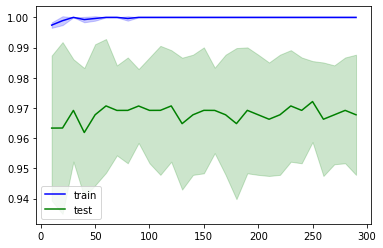

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

df = pd.read_csv('wbca.csv')
data = df[['Adhes', 'BNucl', 'Chrom', 'Epith', 'Mitos', 'NNucl', 'Thick', 'UShap', 'USize']]

X = data.to_numpy()
y = list(df['Class'].to_numpy())

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)
         
dtc = DecisionTreeClassifier().fit(X_train,y_train)
y_pred_dtc = dtc.predict(X_test)
print(CR(y_test,y_pred_dtc))

rfc = RandomForestClassifier().fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)
print(CR(y_test,y_pred_rfc))

params = range(10,300,10)
train_scores, test_scores = validation_curve(estimator=RandomForestClassifier(), X=X,
                                            y=y, param_name='n_estimators',
                                            param_range=params, cv=5)
         
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
         
plt.figure()
plt.plot(params, train_mean, 'b', label='train')
plt.plot(params, test_mean, 'g', label='test')
plt.fill_between(params, train_mean-train_std, train_mean+train_std, color='blue', alpha=.2)
plt.fill_between(params, test_mean-test_std, test_mean+test_std, color='green', alpha=.2)
plt.legend()
plt.show()